# EC Women clothing

In [37]:
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from pandas.plotting import radviz

import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
from collections import Counter
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.drop(df.columns[0], inplace=True, axis=1)

# Delete missing observations for following variables
for x in ["Division Name", "Department Name", "Class Name", "Review Text"]:
    df = df[df[x].notnull()]

# Word Length
df["Word Count"] = df['Review Text'].str.split().apply(len)
# Character Length
df["Character Count"] = df['Review Text'].apply(len)
# Boolean for Positive and Negative Reviews
df["Label"] = 0
df.loc[df.Rating >= 3,["Label"]] = 1

In [3]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Word Count,Character Count,Label
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,919.695908,43.282880,4.183092,0.818764,2.631784,60.211950,308.619586,0.895263
std,201.683804,12.328176,1.115911,0.385222,5.787520,28.533053,143.822516,0.306222
min,1.000000,18.000000,1.000000,0.000000,0.000000,2.000000,9.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,36.000000,186.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,59.000000,301.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,88.000000,458.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,115.000000,508.000000,1.000000


In [4]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Count,Character Count,Label
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,53,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,62,303,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,500,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,124,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,192,1


## 2. Data Exploration

### 2.1. Basic 
1. Age:
2. Feedback
3. Clothing ID

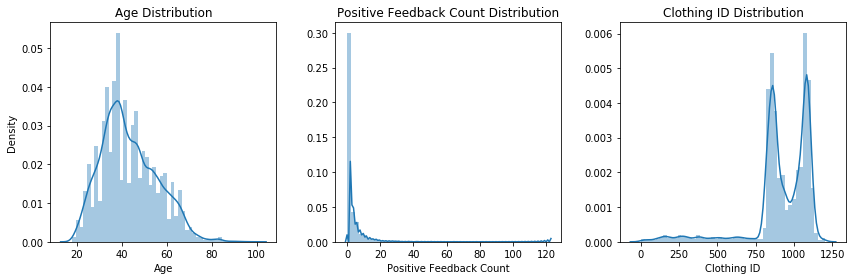

In [5]:
# Continous Distributions
f, ax = plt.subplots(1, 3, figsize=(12,4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")
sns.distplot(df["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")
sns.distplot(df["Clothing ID"], ax=ax[2])
ax[2].set_title("Clothing ID Distribution")
ax[2].set_xlabel("Clothing ID")
plt.tight_layout()
#plt.show()

#### Insight
##### Age distribution
In first thought, the age women who buy through EC would be 20~30. Though, we have the mean age around 40, it's gonna be a useful clue.
##### Positive feedback count
Most of the reviews on the Internet share this common effect that people tend to give positive feedbacks to the more favored reviews.
##### Clothing ID distribution
Nothing we get from this distribution

Text(0,0.5,'')

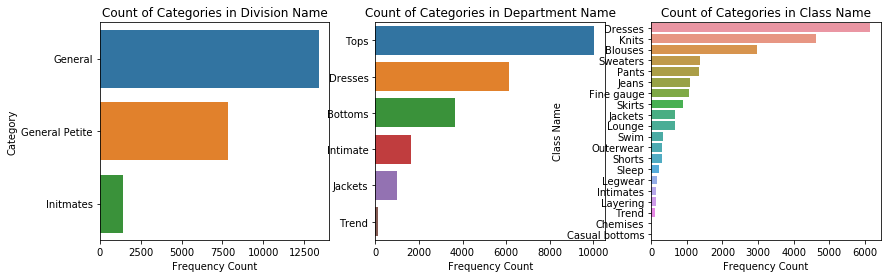

In [6]:
plots = ["Division Name", "Department Name", "Class Name"]
f, axes = plt.subplots(1, len(plots), figsize=(14,4), sharex=False)

for i, x in enumerate(plots):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Count of Categories in {x}")
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
#plt.show()

Text(0,0.5,'')

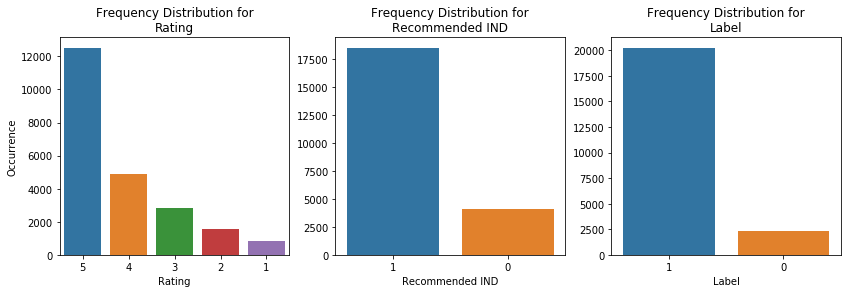

In [7]:
#cat_dtypes = [x for x,y,z in unique_count if y < 10 and x not in ["Division Name","Department Name"]]
cat_dtypes = ["Rating","Recommended IND","Label"]
increment = 0
f, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df,order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title("Frequency Distribution for\n{}".format(cat_dtypes[increment]))
    axes[i].set_ylabel("Occurrence")
    axes[i].set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel("")
axes[2].set_ylabel("")
#plt.show()

#### Insight
##### 

### 2.2. Word and Character Count Distribution by Variables

Correlation Coefficient of Word Cound and Character Count: 0.99

Total Word Count is: 1362476
Total Character Count is: 6983444


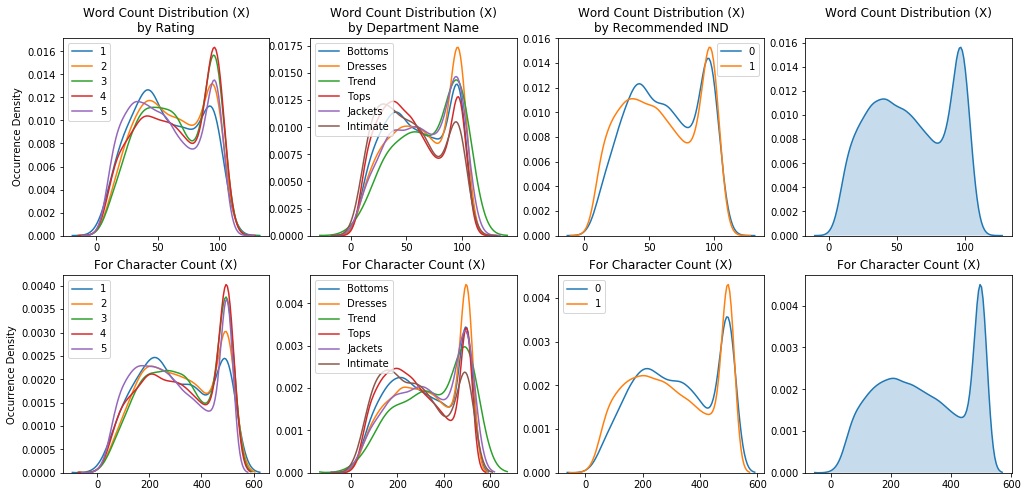

In [8]:
f, axes = plt.subplots(2, 4, figsize=(17, 8), sharex=False)
for ii, xvar in enumerate(['Word Count', "Character Count"]):
    for i, y in enumerate(["Rating", "Department Name", "Recommended IND"]):
        for x in set(df[y][df[y].notnull()]):
            sns.kdeplot(df[xvar][df[y]==x], label=x, shade=False, ax=axes[ii, i])
        if ii is 0:
            axes[ii, i].set_title(f'{xvar} Distribution (X)\nby {y}')
        else:
            axes[ii, i].set_title(f'For {xvar} (X)')
    axes[ii, 0].set_ylabel('Occurrence Density')
    axes[ii, i].set_xlabel('')
    # Plot 4
    sns.kdeplot(df[xvar], shade=True, ax=axes[ii, 3])
    axes[ii, 3].set_xlabel("")
    if ii is 0:
        axes[ii, 3].set_title(f'{xvar} Distribution (X)\n')
    else:
        axes[ii, 3].set_title(f'For {xvar} (X)')
    axes[ii, 3].legend_.remove()
#plt.show()

print("Correlation Coefficient of Word Cound and Character Count: {}".format(
    round(df["Word Count"].corr(df["Character Count"]), 2)))

print("\nTotal Word Count is: {}".format(df["Word Count"].sum()))
print("Total Character Count is: {}".format(df["Character Count"].sum()))

#### Insight
1. People giving lower rating tend to use less words and characters in their reviews.
2. Word count and character count have very high correlation, meaning they are much like the same discrmminator.

### 2.3. Age Distribution by Variables

Text(0.5,1,'Age Distribution by Class Name')

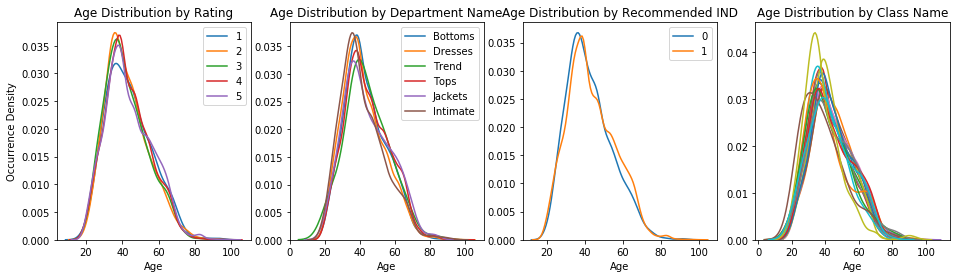

In [9]:
f, axes = plt.subplots(1,4, figsize=(16,4), sharex=False)
xvar = "Age"
plotdf = df["Age"]
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=False, ax=axes[i])
    axes[i].set_xlabel("{}".format(xvar))
    axes[i].set_label('Occurrence Density')
    axes[i].set_title('{} Distribution by {}'.format(xvar, y))

for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(plotdf[df["Class Name"]==x], label=x, shade=False, ax=axes[3])

axes[3].legend_.remove()
axes[3].set_xlabel('{}'.format(xvar))
axes[0].set_ylabel('Occurrence Density')
axes[3].set_title('{} Distribution by {}'.format(xvar, "Class Name"))
#plt.show()

#### Insight
There's probably no clear relationship between age and other variables.

### 2.4. Rating discrete ditribution by Recommended IND 

Text(0,0.5,'Count')

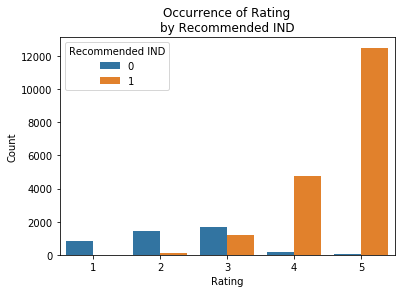

In [10]:
huevar = "Rating"
ax = sns.countplot(x="Rating", hue="Recommended IND", data=df)
ax.set_title("Occurrence of {}\nby {}".format(huevar, "Recommended IND"))
ax.set_ylabel("Count")

#### Insight
1. It seems that the more rating a product received the more recommendations it will get, except for rating 3
2. Here comes a question: Why people dislke this product still recommend to others? It doesn't make sense in the first spot.

## 3. Unsupervised Learning
Main goal: I wanna know the customer cluster based on their
1. text reviews
2. products
3. maybe other features

Let's get started!

### 3.1. Text Exploration

In [11]:
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
16012,Must have!,So cute and comfy. great fit. i bought them in...,5
12192,NaN,"Beautiful sweater, perfect length, surprisingl...",5
10643,Choral ruffle top,In the photo and from far away this top looks ...,3
14231,Great fit and styling!,Love this ripple-front top. fabric is beautifu...,5
4469,Too boxy and heavy if you are petite and curvey,I was looking forward to this cute top to get ...,3
21209,NaN,Love this top! very feminine and looks cute wi...,5
15872,Great fall purchase!,I can't wait for the first signs of fall so i ...,5


In [12]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ')
    words = tokenizer.tokenize(txt)
    words = [w for w in words if not w in stop_words]
    words = [ps.stem(w) for w in words]
    return words

In [13]:
words = preprocessing(df["Review Text"])

In [14]:
Counter(words).most_common(20)

[('dress', 12187),
 ('fit', 11509),
 ('love', 11388),
 ('size', 10719),
 ('look', 9352),
 ('top', 8375),
 ('wear', 8068),
 ('like', 7874),
 ('color', 7299),
 ('great', 6115),
 ('5', 5549),
 ('would', 5108),
 ('order', 5014),
 ('fabric', 4892),
 ('small', 4750),
 ('realli', 3924),
 ('perfect', 3852),
 ('nice', 3819),
 ('littl', 3775),
 ('one', 3732)]

In [15]:
stopwords = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()

#### 3.2. Word Cloud 

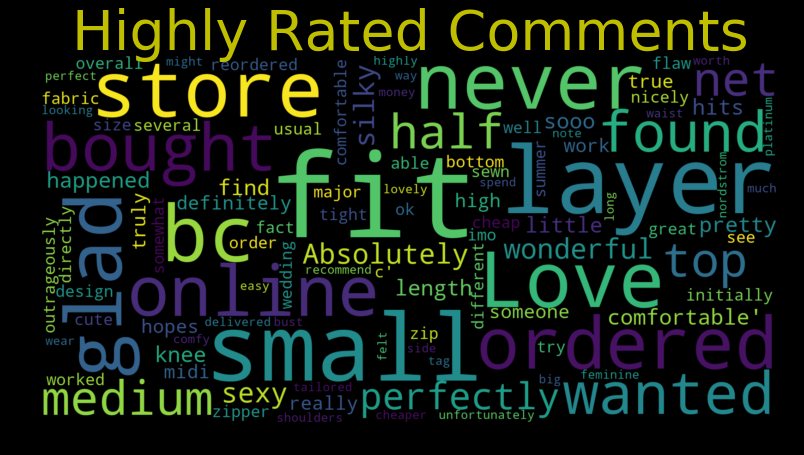

In [16]:
# Highly Raited
title = "Highly Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

cloud(text=temp.values, title=title, stopwords=new_stop)

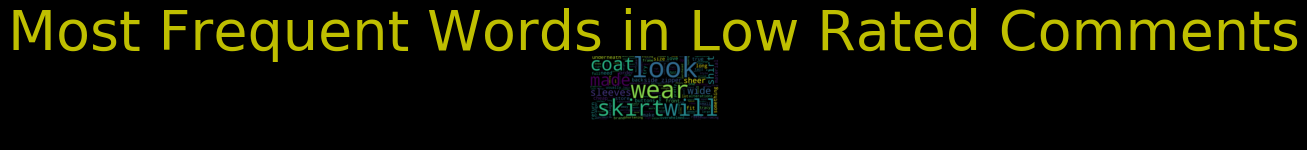

In [17]:
# Low Raited
title ="Most Frequent Words in Low Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])  # "skirt","shirt"

cloud(temp.values, title= title, stopwords = new_stop)

### 3.3. Rescale the data

In [68]:
data = df[["Age", "Rating", "Positive Feedback Count", "Word Count", "Character Count"]]
rs = RobustScaler()
rs.fit_transform(data)

array([[-0.44444444, -1.        , -0.33333333, -0.98076923, -0.91176471],
       [-0.38888889,  0.        ,  1.        ,  0.05769231,  0.00735294],
       [ 1.05555556, -2.        , -0.33333333,  0.75      ,  0.73161765],
       ...,
       [-0.55555556, -2.        ,  0.        , -0.32692308, -0.34191176],
       [-0.72222222, -2.        ,  0.33333333,  0.51923077,  0.46323529],
       [ 0.61111111,  0.        ,  7.        , -0.76923077, -0.70220588]])

### 3.4. Multivariate 2d visulization using RadViz
#### RadViz intro
> Each Series in the DataFrame is represented as a evenly distributed slice on a circle. Each data point is rendered in the circle according to the value on each Series. Highly correlated Series in the DataFrame are placed closer on the unit circle.

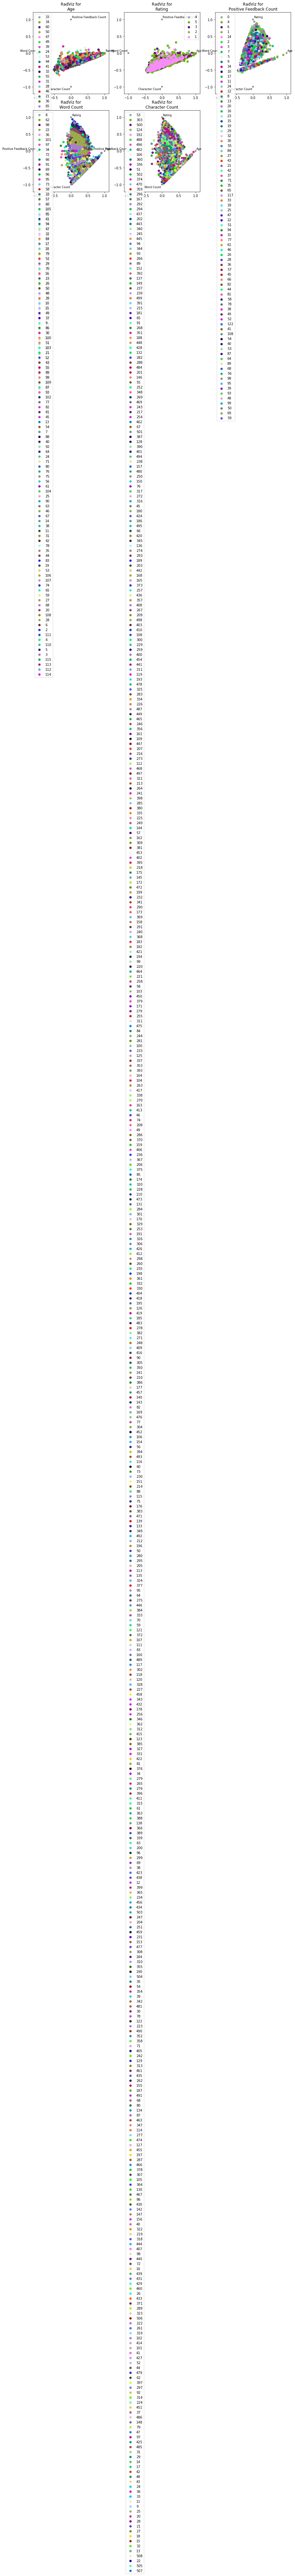

In [83]:
plots = data.columns.tolist()
fig = plt.figure(figsize=(14,10))

for i, x in enumerate(plots):
    axes[i] = fig.add_subplot(2, 3, i+1)  # num must be 1 <= num <= 6, not 0
    radviz(data, x, ax=axes[i])
    axes[i].set_title(f"RadViz for\n{x}")

### KMeans clustering
Let's have a quick look on the customers and the product

In [40]:
#K means Clustering 
def Kmeans(data, nclust):
    model = KMeans(nclust)
    model.fit(data)
    clust_labels = model.predict(data)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [41]:
clust_labels, cent = Kmeans(data, 3)
kmeans = pd.DataFrame(clust_labels)
data.insert((data.shape[1]), 'kmeans', kmeans)

In [89]:
data.columns.tolist()

['Age', 'Rating', 'Positive Feedback Count', 'Word Count', 'Character Count']

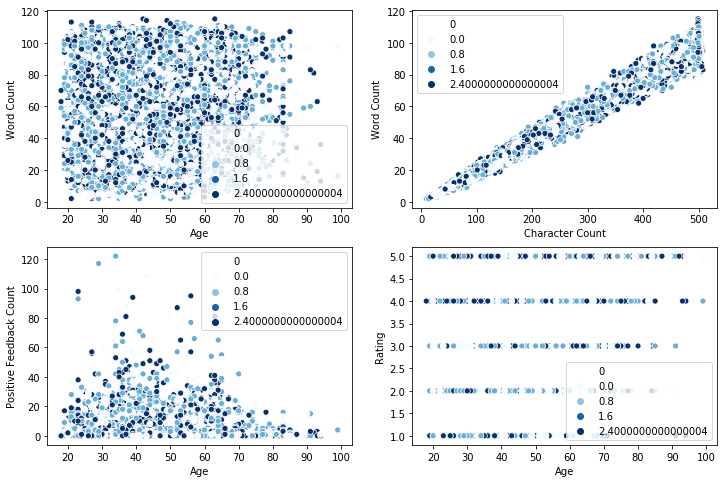

In [92]:
#plots = ["Division Name", "Department Name", "Class Name"]
fig = plt.figure(figsize=(12, 8))
fig.add_subplot(2, 2, 1)
sns.scatterplot(x="Age", y="Word Count", hue=kmeans[0], data=data, palette="Blues")

fig.add_subplot(2, 2, 2)
sns.scatterplot(x="Character Count", y="Word Count", hue=kmeans[0], data=data, palette="Blues")

fig.add_subplot(2, 2, 3)
sns.scatterplot(x="Age", y="Positive Feedback Count", hue=kmeans[0], data=data, palette="Blues")

fig.add_subplot(2, 2, 4)
sns.scatterplot(x="Age", y="Rating", hue=kmeans[0], data=data, palette="Blues")